In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

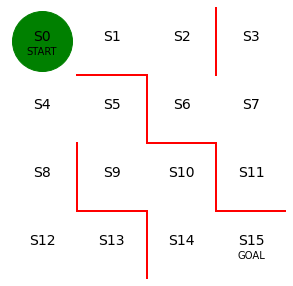

In [2]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([2,2], [0,1], color='red', linewidth=2)
plt.plot([1,2], [1,1], color='red', linewidth=2)
plt.plot([3,4], [1,1], color='red', linewidth=2)
plt.plot([1,1], [1,2], color='red', linewidth=2)
plt.plot([3,3], [1,2], color='red', linewidth=2)
plt.plot([2,3], [2,2], color='red', linewidth=2)
plt.plot([2,2], [2,3], color='red', linewidth=2)
plt.plot([1,2], [3,3], color='red', linewidth=2)
plt.plot([3,3], [3,4], color='red', linewidth=2)

plt.text(0.5, 3.5, 'S0', size=14, ha='center')
plt.text(1.5, 3.5, 'S1', size=14, ha='center')
plt.text(2.5, 3.5, 'S2', size=14, ha='center')
plt.text(3.5, 3.5, 'S3', size=14, ha='center')
plt.text(0.5, 2.5, 'S4', size=14, ha='center')
plt.text(1.5, 2.5, 'S5', size=14, ha='center')
plt.text(2.5, 2.5, 'S6', size=14, ha='center')
plt.text(3.5, 2.5, 'S7', size=14, ha='center')
plt.text(0.5, 1.5, 'S8', size=14, ha='center')
plt.text(1.5, 1.5, 'S9', size=14, ha='center')
plt.text(2.5, 1.5, 'S10', size=14, ha='center')
plt.text(3.5, 1.5, 'S11', size=14, ha='center')
plt.text(0.5, 0.5, 'S12', size=14, ha='center')
plt.text(1.5, 0.5, 'S13', size=14, ha='center')
plt.text(2.5, 0.5, 'S14', size=14, ha='center')
plt.text(3.5, 0.5, 'S15', size=14, ha='center')
plt.text(0.5, 3.3, 'START', ha='center')
plt.text(3.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
plt.axis('off')

line, = ax.plot([0.5],[3.5], marker='o', color='g', markersize=60)

In [3]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],
[np.nan, 1, np.nan, 1],
[np.nan, np.nan, 1, 1],
[np.nan, np.nan, 1, np.nan],
[1, 1, 1, np.nan],
[np.nan, np.nan, 1, 1],
[1, 1, np.nan, np.nan],
[1, np.nan, 1, 1],
[1, np.nan, 1, np.nan],
[1, 1, np.nan, np.nan],
[np.nan, np.nan, 1, 1],
[1, np.nan, np.nan, np.nan],
[1, 1, np.nan, np.nan],
[np.nan, np.nan, np.nan, 1],
[1, 1, np.nan, np.nan],
])

In [4]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])

    pi = np.nan_to_num(pi)

    return pi

In [5]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [6]:
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.5       , 0.        , 0.5       , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [7]:
def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        s_next = s - 4
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 4
    elif next_direction == "left":
        s_next = s - 1

    return s_next

In [8]:
def goal_maze(pi):
    s = 0
    state_history = [0]

    while (1):
        next_s = get_next_s(pi, s)
        state_history.append(next_s)

        if next_s == 15:
            break
        else:
            s = next_s

    return state_history

In [9]:
state_history = goal_maze(pi_0)

In [10]:
print(state_history)
print("迷路を解くのにかかったステップ数は" + str(len(state_history) - 1) + "です")

[0, 4, 5, 4, 0, 1, 2, 6, 2, 6, 7, 3, 7, 6, 2, 1, 0, 1, 0, 4, 8, 4, 0, 4, 0, 1, 2, 6, 2, 1, 0, 1, 2, 6, 7, 3, 7, 6, 2, 6, 7, 3, 7, 6, 2, 6, 7, 11, 7, 6, 2, 6, 7, 6, 2, 1, 0, 1, 0, 1, 2, 6, 7, 11, 7, 6, 2, 1, 0, 1, 2, 6, 2, 1, 0, 4, 0, 4, 0, 4, 5, 4, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 4, 8, 4, 0, 4, 0, 4, 5, 9, 10, 9, 10, 14, 10, 14, 15]
迷路を解くのにかかったステップ数は112です


In [11]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = state_history[i]
    x = (state % 4) + 0.5
    y = 3.5 - int(state / 4)
    line.set_data(x,y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

In [12]:
def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    [m,n] = theta.shape
    pi = np.zeros((m,n))

    exp_theta = np.exp(beta * theta)

    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])

    pi = np.nan_to_num(pi)

    return pi

In [13]:
def get_acrion_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 4
    elif next_direction == "right":
        action = 1
        s_next = s + 1
    elif next_direction == "down":
        action = 2
        s_next = s + 4
    elif next_direction == "left":
        action = 3
        s_next = s - 1

    return [action, s_next]

In [14]:
def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]

    while (1):
        [action, next_s] = get_acrion_and_next_s(pi, s)
        s_a_history[-1][1] = action

        s_a_history.append([next_s, np.nan])

        if next_s == 15:
            break
        else:
            s = next_s

    return s_a_history

In [15]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1

    [m, n] = theta.shape
    delta_theta = theta.copy()

    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):

                SA_i = [SA for SA in s_a_history if SA[0] == i]

                SA_ij = [SA for SA in s_a_history if SA == [i,j]]

                N_i = len(SA_i)
                N_ij = len(SA_ij)
                delta_theta[i,j] = (N_ij - pi[i,j] * N_i) / T

    new_theta = theta + eta * delta_theta
    
    return new_theta

In [16]:
stop_epsilon = 10**-4

theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)

    print(np.sum(np.abs(new_pi - pi)))
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) -1) + "です")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.02409429398049512
迷路を解くのにかかったステップ数は12です
0.016745029223384555
迷路を解くのにかかったステップ数は44です
0.00631025221276299
迷路を解くのにかかったステップ数は398です
0.008533597543871008
迷路を解くのにかかったステップ数は48です
0.012146075997400807
迷路を解くのにかかったステップ数は160です
0.005315150052760009
迷路を解くのにかかったステップ数は618です
0.016418947528161087
迷路を解くのにかかったステップ数は76です
0.0067416985152676245
迷路を解くのにかかったステップ数は304です
0.039549786155247846
迷路を解くのにかかったステップ数は10です
0.04062486103153973
迷路を解くのにかかったステップ数は22です
0.018241088478875178
迷路を解くのにかかったステップ数は28です
0.01654060880514724
迷路を解くのにかかったステップ数は50です
0.020349454891947893
迷路を解くのにかかったステップ数は64です
0.008521631999703239
迷路を解くのにかかったステップ数は124です
0.007308448901185927
迷路を解くのにかかったステップ数は254です
0.010901084050410903
迷路を解くのにかかったステップ数は102です
0.007526101269513974
迷路を解くのにかかったステップ数は262です
0.010448487821606456
迷路を解くのにかかったステップ数は110です
0.003951116582350089
迷路を解くのにかかったステップ数は276です
0.01694268347084721
迷路を解くのにかかったステップ数は66です
0.005303114851662238
迷路を解くのにかかったステップ数は402です
0.008387197435250793
迷路を解くのにかかったステップ数は212です
0.005357898450354059
迷路を解くのにかかったステップ数は664です
0.

In [17]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = s_a_history[i][0]
    x = (state % 4) + 0.5
    y = 3.5 - int(state / 4)
    line.set_data(x,y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

In [18]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0

In [19]:
def simple_convert_into_pi_from_theta(theta):

    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])

    pi = np.nan_to_num(pi)

    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [20]:
def get_action(s, Q, epsilon, pi_0):
    direction = ["up","right","down","left"]

    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]

    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up","right","down","left"]
    next_direction = direction[a]

    if next_direction == "up":
        s_next = s - 4
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 4
    elif next_direction == "left":
        s_next = s - 1

    return s_next

In [21]:
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 15:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

    return Q

In [22]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]

    while(1):
        a = a_next

        s_a_history[-1][1] = a

        s_next = get_s_next(s, a, Q, epsilon, pi)

        s_a_history.append([s_next, np.nan])

        if s_next == 15:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)

        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

        if s_next == 15:
            break
        else:
            s = s_next

    return [s_a_history, Q]

In [23]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

while is_continue:
    print("エピソード:" + str(episode))

    epsilon = epsilon / 2

    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v

    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) -1) + "です")

    episode = episode + 1
    if episode > 100:
        break

エピソード:1
2.737615743274043
迷路を解くのにかかったステップ数は422です
エピソード:2
0.10600979280897288
迷路を解くのにかかったステップ数は18です
エピソード:3
0.06828657439947478
迷路を解くのにかかったステップ数は8です
エピソード:4
0.06092231832461015
迷路を解くのにかかったステップ数は8です
エピソード:5
0.05526965500887637
迷路を解くのにかかったステップ数は10です
エピソード:6
0.04820764643530612
迷路を解くのにかかったステップ数は8です
エピソード:7
0.04266875416714477
迷路を解くのにかかったステップ数は6です
エピソード:8
0.03924029507967158
迷路を解くのにかかったステップ数は6です
エピソード:9
0.04108707740983919
迷路を解くのにかかったステップ数は8です
エピソード:10
0.03738240715452179
迷路を解くのにかかったステップ数は6です
エピソード:11
0.036790373611047644
迷路を解くのにかかったステップ数は6です
エピソード:12
0.03621901209031725
迷路を解くのにかかったステップ数は6です
エピソード:13
0.035734756895497766
迷路を解くのにかかったステップ数は6です
エピソード:14
0.03506918493434302
迷路を解くのにかかったステップ数は6です
エピソード:15
0.035620410190489005
迷路を解くのにかかったステップ数は8です
エピソード:16
0.03629866811173482
迷路を解くのにかかったステップ数は8です
エピソード:17
0.03331201875312706
迷路を解くのにかかったステップ数は6です
エピソード:18
0.032600936950016424
迷路を解くのにかかったステップ数は6です
エピソード:19
0.03198266452989601
迷路を解くのにかかったステップ数は6です
エピソード:20
0.03158284302452513
迷路を解くのにかかったステップ数は6です
エピソ

In [24]:
def Q_learning(s, a, r, s_next, Q, eta, gamma):
    if s_next == 15:
        Q[s,a] = Q[s,a] + eta * (r - Q[s,a])
    else:
        Q[s,a] = Q[s,a] + eta * (r + gamma * np.nanmax(Q[s_next,:]) - Q[s,a])

    return Q

In [25]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0 * 0.1

In [26]:
eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

V = []
V.append(np.nanmax(Q, axis=1))

while is_continue:
    print("エピソード:" + str(episode))

    epsilon = epsilon / 2

    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    V.append(v)

    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) -1) + "です")

    episode = episode + 1
    if episode > 100:
        break

エピソード:1
0.32876130252288743
迷路を解くのにかかったステップ数は530です
エピソード:2
0.10469572592477919
迷路を解くのにかかったステップ数は62です
エピソード:3
0.09261071175346991
迷路を解くのにかかったステップ数は16です
エピソード:4
0.0904777054143799
迷路を解くのにかかったステップ数は6です
エピソード:5
0.0895719736023414
迷路を解くのにかかったステップ数は6です
エピソード:6
0.08865471110805903
迷路を解くのにかかったステップ数は6です
エピソード:7
0.08773002061874019
迷路を解くのにかかったステップ数は6です
エピソード:8
0.08680121362282583
迷路を解くのにかかったステップ数は6です
エピソード:9
0.08587084836188377
迷路を解くのにかかったステップ数は6です
エピソード:10
0.08494076279966256
迷路を解くのにかかったステップ数は6です
エピソード:11
0.08401211117274476
迷路を解くのにかかったステップ数は6です
エピソード:12
0.0830854084891274
迷路を解くのにかかったステップ数は6です
エピソード:13
0.08216058446325061
迷路を解くのにかかったステップ数は6です
エピソード:14
0.08123704649071975
迷路を解くのにかかったステップ数は6です
エピソード:15
0.08031375011544967
迷路を解くのにかかったステップ数は6です
エピソード:16
0.07938927482497932
迷路を解くのにかかったステップ数は6です
エピソード:17
0.0784619027705016
迷路を解くのにかかったステップ数は6です
エピソード:18
0.07752969802740711
迷路を解くのにかかったステップ数は6です
エピソード:19
0.07659058419950027
迷路を解くのにかかったステップ数は6です
エピソード:20
0.07564241845814135
迷路を解くのにかかったステップ数は6です
エピソード:21


In [27]:
import time

In [28]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]

    while(1):
        a = a_next

        s_a_history[-1][1] = a

        s_next = get_s_next(s, a, Q, epsilon, pi)

        s_a_history.append([s_next, np.nan])

        if s_next == 15:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)

        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)

        if s_next == 15:
            break
        else:
            s = s_next

    return [s_a_history, Q]

eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1
stop_epsilon = 10**-4

loop = 10
sum_time = 0

for i in range(loop):
    start_time = time.perf_counter()

    while is_continue:
       print("エピソード:" + str(episode))
       print("ループ数:" + str(i))
       
       epsilon = epsilon / 2

       [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
       new_v = np.nanmax(Q, axis=1)
       print(np.sum(np.abs(new_v - v)))
       print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) -1) + "です")

       if np.sum(np.abs(new_v - v)) < stop_epsilon:
           is_continue = False
       else:
           v = new_v
           episode = episode + 1

    end_time = time.perf_counter()
    sum_time += end_time - start_time
    
    epsilon = 0.5
    v = np.nanmax(Q, axis=1)
    is_continue = True
    episode = 1

ave_time = sum_time / loop
print("time:" + str(ave_time))

エピソード:1
ループ数:0
0.0033844796441885316
迷路を解くのにかかったステップ数は8です
エピソード:2
ループ数:0
0.003081340003656674
迷路を解くのにかかったステップ数は6です
エピソード:3
ループ数:0
0.002896691691443909
迷路を解くのにかかったステップ数は6です
エピソード:4
ループ数:0
0.0027221398515903106
迷路を解くのにかかったステップ数は6です
エピソード:5
ループ数:0
0.00255720279034255
迷路を解くのにかかったステップ数は6です
エピソード:6
ループ数:0
0.002401417735223399
迷路を解くのにかかったステップ数は6です
エピソード:7
ループ数:0
0.002254340102565866
迷路を解くのにかかったステップ数は6です
エピソード:8
ループ数:0
0.002115542853058927
迷路を解くのにかかったステップ数は6です
エピソード:9
ループ数:0
0.001984615915346044
迷路を解くのにかかったステップ数は6です
エピソード:10
ループ数:0
0.0018611656615581396
迷路を解くのにかかったステップ数は6です
エピソード:11
ループ数:0
0.0017448144218872308
迷路を解くのにかかったステップ数は6です
エピソード:12
ループ数:0
0.0016352000279855616
迷路を解くのにかかったステップ数は6です
エピソード:13
ループ数:0
0.0015319753771998457
迷路を解くのにかかったステップ数は6です
エピソード:14
ループ数:0
0.0014348080114904294
迷路を解くのにかかったステップ数は6です
エピソード:15
ループ数:0
0.0013433797063894248
迷路を解くのにかかったステップ数は6です
エピソード:16
ループ数:0
0.0012573860665854308
迷路を解くのにかかったステップ数は6です
エピソード:17
ループ数:0
0.001176536125716332
迷路を解くのにかかったステップ数は6です
エピソード:18
ループ数:0

In [29]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]

    while(1):
        a = a_next

        s_a_history[-1][1] = a

        s_next = get_s_next(s, a, Q, epsilon, pi)

        s_a_history.append([s_next, np.nan])

        if s_next == 15:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)

        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

        if s_next == 15:
            break
        else:
            s = s_next

    return [s_a_history, Q]

eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1
stop_epsilon = 10**-4

loop = 10
sum_time = 0

for i in range(loop):
    start_time = time.perf_counter()

    while is_continue:
       print("エピソード:" + str(episode))
       print("ループ数:" + str(i))
       
       epsilon = epsilon / 2

       [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
       new_v = np.nanmax(Q, axis=1)
       print(np.sum(np.abs(new_v - v)))
       print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) -1) + "です")

       if np.sum(np.abs(new_v - v)) < stop_epsilon:
           is_continue = False
       else:
           v = new_v
           episode = episode + 1

    end_time = time.perf_counter()
    sum_time += end_time - start_time
    
    epsilon = 0.5
    v = np.nanmax(Q, axis=1)
    is_continue = True
    episode = 1

ave_time = sum_time / loop
print("time:" + str(ave_time))

エピソード:1
ループ数:0
3.0357388469348656e-05
迷路を解くのにかかったステップ数は6です
エピソード:1
ループ数:1
0.055977135078538076
迷路を解くのにかかったステップ数は8です
エピソード:2
ループ数:1
0.010653507303252874
迷路を解くのにかかったステップ数は6です
エピソード:3
ループ数:1
0.009529236665766216
迷路を解くのにかかったステップ数は6です
エピソード:4
ループ数:1
0.008493882297424094
迷路を解くのにかかったステップ数は6です
エピソード:5
ループ数:1
0.00759097189853708
迷路を解くのにかかったステップ数は6です
エピソード:6
ループ数:1
0.006772681083646259
迷路を解くのにかかったステップ数は6です
エピソード:7
ループ数:1
0.006028913482607923
迷路を解くのにかかったステップ数は6です
エピソード:8
ループ数:1
0.005351296350035617
迷路を解くのにかかったステップ数は6です
エピソード:9
ループ数:1
0.004732848710462867
迷路を解くのにかかったステップ数は6です
エピソード:10
ループ数:1
0.004167710751465381
迷路を解くのにかかったステップ数は6です
エピソード:11
ループ数:1
0.0036521657480395042
迷路を解くのにかかったステップ数は6です
エピソード:12
ループ数:1
0.0035695571882181643
迷路を解くのにかかったステップ数は6です
エピソード:13
ループ数:1
0.003449385375538516
迷路を解くのにかかったステップ数は6です
エピソード:14
ループ数:1
0.003300165114892617
迷路を解くのにかかったステップ数は6です
エピソード:15
ループ数:1
0.0031292243012415177
迷路を解くのにかかったステップ数は6です
エピソード:16
ループ数:1
0.0029428263092372564
迷路を解くのにかかったステップ数は6です
エピソード:17
ループ数:1
0.0

In [30]:
theta = theta_0
pi = pi_0
stop_epsilon = 10**-4

is_continue = True

loop = 10
sum_time = 0

for i in range(loop):
    start_time = time.perf_counter()

    while is_continue:
        s_a_history = goal_maze_ret_s_a(pi)
        new_theta = update_theta(theta, pi, s_a_history)
        new_pi = softmax_convert_into_pi_from_theta(new_theta)

        print("ループ数:" + str(i))
        print(np.sum(np.abs(new_pi - pi)))
        print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) -1) + "です")

        if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
            is_continue = False
        else:
            theta = new_theta
            pi = new_pi

    end_time = time.perf_counter()
    sum_time += end_time - start_time
    
    epsilon = 0.5
    v = np.nanmax(Q, axis=1)
    is_continue = True
    episode = 1

ave_time = sum_time / loop
print("time:" + str(ave_time))

ループ数:0
0.018045165532919905
迷路を解くのにかかったステップ数は20です
ループ数:0
0.009496692842105303
迷路を解くのにかかったステップ数は166です
ループ数:0
0.013855244422705304
迷路を解くのにかかったステップ数は44です
ループ数:0
0.013335675297115102
迷路を解くのにかかったステップ数は40です
ループ数:0
0.009367895498164913
迷路を解くのにかかったステップ数は72です
ループ数:0
0.008595346137596604
迷路を解くのにかかったステップ数は200です
ループ数:0
0.011129475210088446
迷路を解くのにかかったステップ数は78です
ループ数:0
0.005610073966792861
迷路を解くのにかかったステップ数は628です
ループ数:0
0.010239901711211974
迷路を解くのにかかったステップ数は152です
ループ数:0
0.008399016447732222
迷路を解くのにかかったステップ数は172です
ループ数:0
0.010302524262230273
迷路を解くのにかかったステップ数は102です
ループ数:0
0.00927409418496089
迷路を解くのにかかったステップ数は196です
ループ数:0
0.005416452485788981
迷路を解くのにかかったステップ数は640です
ループ数:0
0.007566101799859948
迷路を解くのにかかったステップ数は202です
ループ数:0
0.011988860681651559
迷路を解くのにかかったステップ数は88です
ループ数:0
0.01566102835656491
迷路を解くのにかかったステップ数は68です
ループ数:0
0.00913199473483034
迷路を解くのにかかったステップ数は266です
ループ数:0
0.006916855964776258
迷路を解くのにかかったステップ数は198です
ループ数:0
0.017099336327833836
迷路を解くのにかかったステップ数は88です
ループ数:0
0.02777953856005505
迷路を解くのにかかったステップ

In [31]:
def grad_func():
    theta = theta_0
    pi = pi_0
    stop_epsilon = 10**-4

    is_continue = True

    loop = 10
    sum_time = 0

    for i in range(loop):
        start_time = time.perf_counter()

        while is_continue:
            s_a_history = goal_maze_ret_s_a(pi)
            new_theta = update_theta(theta, pi, s_a_history)
            new_pi = softmax_convert_into_pi_from_theta(new_theta)

            if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
                is_continue = False
            else:
                theta = new_theta
                pi = new_pi

        end_time = time.perf_counter()
        sum_time += end_time - start_time
    
        epsilon = 0.5
        v = np.nanmax(Q, axis=1)
        is_continue = True
        episode = 1

    ave_time = sum_time / loop
    return ave_time

def sarsa_func():
    def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
        s = 0
        a = a_next = get_action(s, Q, epsilon, pi)
        s_a_history = [[0, np.nan]]

        while(1):
            a = a_next

            s_a_history[-1][1] = a

            s_next = get_s_next(s, a, Q, epsilon, pi)

            s_a_history.append([s_next, np.nan])

            if s_next == 15:
                r = 1
                a_next = np.nan
            else:
                r = 0
                a_next = get_action(s_next, Q, epsilon, pi)

            Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

            if s_next == 15:
                break
            else:
                s = s_next

        return [s_a_history, Q]

    [a, b] = theta_0.shape
    Q = np.random.rand(a, b) * theta_0 * 0.1

    eta = 0.1
    gamma = 0.9
    epsilon = 0.5
    v = np.nanmax(Q, axis=1)
    is_continue = True
    episode = 1
    stop_epsilon = 10**-4

    loop = 10
    sum_time = 0

    for i in range(loop):
        start_time = time.perf_counter()

        while is_continue:
            epsilon = epsilon / 2

            [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
            new_v = np.nanmax(Q, axis=1)

            if np.sum(np.abs(new_v - v)) < stop_epsilon:
                is_continue = False
            else:
                v = new_v
                episode = episode + 1
    
        end_time = time.perf_counter()
        sum_time += end_time - start_time

        epsilon = 0.5
        v = np.nanmax(Q, axis=1)
        is_continue = True
        episode = 1

    ave_time = sum_time / loop
    return ave_time

def q_learning_func():
    def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
        s = 0
        a = a_next = get_action(s, Q, epsilon, pi)
        s_a_history = [[0, np.nan]]

        while(1):
            a = a_next

            s_a_history[-1][1] = a

            s_next = get_s_next(s, a, Q, epsilon, pi)

            s_a_history.append([s_next, np.nan])

            if s_next == 15:
                r = 1
                a_next = np.nan
            else:
                r = 0
                a_next = get_action(s_next, Q, epsilon, pi)

            Q = Q_learning(s, a, r, s_next, Q, eta, gamma)

            if s_next == 15:
                break
            else:
                s = s_next

        return [s_a_history, Q]

    [a, b] = theta_0.shape
    Q = np.random.rand(a, b) * theta_0 * 0.1

    eta = 0.1
    gamma = 0.9
    epsilon = 0.5
    v = np.nanmax(Q, axis=1)
    is_continue = True
    episode = 1
    stop_epsilon = 10**-4

    loop = 10
    sum_time = 0
    
    for i in range(loop):
        start_time = time.perf_counter()

        while is_continue:
            epsilon = epsilon / 2

            [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
            new_v = np.nanmax(Q, axis=1)
            if np.sum(np.abs(new_v - v)) < stop_epsilon:
                is_continue = False
            else:
                v = new_v
                episode = episode + 1

        end_time = time.perf_counter()
        sum_time += end_time - start_time

        epsilon = 0.5
        v = np.nanmax(Q, axis=1)
        is_continue = True
        episode = 1

    ave_time = sum_time / loop
    return ave_time

In [32]:
grad = grad_func()
sarsa = sarsa_func()
q_learning = q_learning_func()

print("方策勾配法の平均収束時間:" + str(grad))
print("Sarsaの平均収束時間:" + str(sarsa))
print("Q学習の平均収束時間:" + str(q_learning))

方策勾配法の平均収束時間:0.6398515699999983
Sarsaの平均収束時間:0.009606280000000567
Q学習の平均収束時間:0.009590259999999518
